We'll demonstrate the problem of nonconvexity here by reinitialization of the y-branch.

In [2]:
from config import Config
import os, sys
sys.path.append(Config.LUMERICAL_API_PATH) # if this fails adjust the config.py and add the lumerical api path
root_path = Config.ROOT_DIR

In [5]:
import numpy as np
import scipy as sp

import lumapi
from lumopt.utilities.wavelengths import Wavelengths
import lumopt.utilities.wavelengths as w1
print("w1 module path:", w1.__file__)
from lumopt.geometries.polygon import FunctionDefinedPolygon
from lumopt.utilities.materials import Material
from lumopt.figures_of_merit.modematch import ModeMatch
from lumopt.optimizers.generic_optimizers import ScipyOptimizers
from lumopt.optimization import Optimization
from lumopt.geometries.polygon import FunctionDefinedPolygon
from lumopt.geometries.geometry import Geometry
from lumopt_gl.geometries.geometry_gl import Geometry_GL
from lumopt_gl.optimization import OptimizationGL
from lumopt_gl.optimizers.optimizer_gl import OptimizerGL

w1 module path: C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\wavelengths.py


In [13]:
def optimizer2D(polygon, base_script, max_iter = 18):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1)

    optimizer = ScipyOptimizers(max_iter = max_iter, method = 'L-BFGS-B', scaling_factor = 1e6, pgtol = 1e-5)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=True, store_all_simulations = False)
    return opt

def optimizer3D(polygon, base_script, max_iter = 15):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental TE mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1) # for 3D, we need to specify TE/TM

    optimizer = OptimizerGL(max_iter = max_iter, ftol = 1.0e-5, method = 'LD_MMA')

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=False, store_all_simulations = False, GPU = True) # and set varFDTD to False. Set GPU to True if you have one.
    return opt

In [9]:
from geometries.ybranch import ybranch_2D


Accurate interface detection enabled


What we are doing here is running the y-branch with different numbers of parameters each time.
We would ASSUME that the higher number of parameters will yield better results (because the solution space of the previous is INSIDE the solution space of the next)

Accurate interface detection enabled
Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]]
start = [0.36666667 0.48333333]
Making forward solve
Making adjoint solve
[3.66666667e-07 4.83333333e-07]
Running solves
Processing forward solve
FOM = 0.7094285927330559
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.e-07 8.e-07]
Running solves
Processing forward solve
FOM = 0.6281657507795895
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[3.15013932e-07 5.81473529e-07]
Running solves
Processing forward solve
FOM = 0.8875672090868248
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.21691511e-07 6.08577393e-07]
Running solves
Processing forward solve
FOM = 0.8925367229761985
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.33779767e-07 6.08830903e-07]
Running solves
Processing forward solve
FOM = 0.8969755027740103
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.64081504e-07 6.23418152e-07]
Running solves
Processing forward solve
FOM = 0.90242322246455
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.83551517e-07 6.36916676e-07]
Running solves
Processing forward solve
FOM = 0.9065218874438546
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[4.61431568e-07 6.90910770e-07]
Running solves
Processing forward solve
FOM = 0.9322225078592853
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[8.e-07 8.e-07]
Running solves
Processing forward solve
FOM = 0.9326780225631085
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[5.75259254e-07 7.27586884e-07]
Running solves
Processing forward solve
FOM = 0.9621778924492461
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.87629627e-07 7.63793442e-07]
Running solves
Processing forward solve
FOM = 0.9728563443615749
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.47897539e-07 7.50991472e-07]
Running solves
Processing forward solve
FOM = 0.9762666337658932
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[8.00000000e-07 5.84020456e-07]
Running solves
Processing forward solve
FOM = 0.6363552874373966
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.60076568e-07 7.37621901e-07]
Running solves
Processing forward solve
FOM = 0.977904391184562
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[8.00000000e-07 7.76042491e-07]
Running solves
Processing forward solve
FOM = 0.9386687229640968
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.68971665e-07 7.40064343e-07]
Running solves
Processing forward solve
FOM = 0.9783491587106629
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.72111391e-07 7.45265369e-07]
Running solves
Processing forward solve
FOM = 0.9784782825159914
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.75699864e-07 7.43107675e-07]
Running solves
Processing forward solve
FOM = 0.9784779547218168
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.73589835e-07 7.44376403e-07]
Running solves
Processing forward solve
FOM = 0.9785130849313325
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.71563533e-07 7.41530030e-07]
Running solves
Processing forward solve
FOM = 0.9784650761952515
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.73017995e-07 7.43573133e-07]
Running solves
Processing forward solve
FOM = 0.9785224779308148
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.72642710e-07 7.43028254e-07]
Running solves
Processing forward solve
FOM = 0.9785194517011907
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72943110e-07 7.43464406e-07]
Running solves
Processing forward solve
FOM = 0.9785225315409904
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.72559878e-07 7.42997936e-07]
Running solves
Processing forward solve
FOM = 0.9785193988776276
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72877374e-07 7.43384391e-07]
Running solves
Processing forward solve
FOM = 0.9785222938613964
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72931628e-07 7.43450431e-07]
Running solves
Processing forward solve
FOM = 0.9785225131985595
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72940928e-07 7.43461751e-07]
Running solves
Processing forward solve
FOM = 0.9785225393310195
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72934790e-07 7.43454279e-07]
Running solves
Processing forward solve
FOM = 0.978522

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.72572560e-07 7.42999929e-07]
Running solves
Processing forward solve
FOM = 0.9785194015961127
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72874815e-07 7.43379052e-07]
Running solves
Processing forward solve
FOM = 0.9785222203116556
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72925737e-07 7.43442924e-07]
Running solves
Processing forward solve
FOM = 0.978522522164285
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72933554e-07 7.43452729e-07]
Running solves
Processing forward solve
FOM = 0.9785225899781569
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72928395e-07 7.43446258e-07]
Running solves
Processing forward solve
FOM = 0.9785225

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.72579691e-07 7.42997921e-07]
Running solves
Processing forward solve
FOM = 0.9785192957512363
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72875961e-07 7.43378706e-07]
Running solves
Processing forward solve
FOM = 0.9785222494363114
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72924702e-07 7.43441352e-07]
Running solves
Processing forward solve
FOM = 0.9785225656863163
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72931991e-07 7.43450720e-07]
Running solves
Processing forward solve
FOM = 0.9785224959145287
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72933492e-07 7.43452649e-07]
Running solves
Processing forward solve
FOM = 0.978522

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.72585713e-07 7.43021230e-07]
Running solves
Processing forward solve
FOM = 0.9785197164063322
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72875367e-07 7.43380545e-07]
Running solves
Processing forward solve
FOM = 0.9785222487560155
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72924660e-07 7.43441693e-07]
Running solves
Processing forward solve
FOM = 0.9785225274165192
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72932289e-07 7.43451157e-07]
Running solves
Processing forward solve
FOM = 0.9785225211587228
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..
Making forward solve
Making adjoint solve
[6.72933445e-07 7.43452590e-07]
Running solves
Processing forward solve
FOM = 0.978522

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.32 0.39 0.46 0.53]
Making forward solve
Making adjoint solve
[3.2e-07 3.9e-07 4.6e-07 5.3e-07]
Running solves
Processing forward solve
FOM = 0.7096290034357878
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[5.18946276e-07 2.00000000e-07 8.00000000e-07 8.00000000e-07]
Running solves
Processing forward solve
FOM = 0.4909496507953651
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....
Making forward solve
Making adjoint solve
[3.66910410e-07 3.45199072e-07 5.40170083e-07 5.93664477e-07]
Running solves
Processing forward solve
FOM = 0.8625654006220723
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.30831420e-07 3.17361266e-07 5.72251911e-07 5.81947621e-07]
Running solves
Processing forward solve
FOM = 0.9085021422297355
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.95774601e-07 2.83612400e-07 6.18558742e-07 5.77098617e-07]
Running solves
Processing forward solve
FOM = 0.9252668587701596
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.83845115e-07 2.85483588e-07 6.11146508e-07 5.79982421e-07]
Running solves
Processing forward solve
FOM = 0.9263490293844028
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.79586918e-07 2.90776990e-07 6.10484553e-07 5.81818381e-07]
Running solves
Processing forward solve
FOM = 0.926757612213164
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....
Making forward solve
Making adjoint solve
[2.62554127e-07 3.11950596e-07 6.07836733e-07 5.89162219e-07]
Running solves
Processing forward solve
FOM = 0.9280643870446192
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....
Making forward solve
Making adjoint solve
[2.00000000e-07 3.89712166e-07 5.98112424e-07 6.16132986e-07]
Running solves
Processing forward solve
FOM = 0.9304154690122604
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00073650e-07 4.03347250e-07 6.22357219e-07 6.16139378e-07]
Running solves
Processing forward solve
FOM = 0.9360290935667785
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.09302095e-07 4.55181951e-07 6.55888131e-07 6.15123808e-07]
Running solves
Processing forward solve
FOM = 0.9438518073124156
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 5.33843808e-07 6.84670731e-07 6.39203567e-07]
Running solves
Processing forward solve
FOM = 0.9516466591189423
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 5.51174487e-07 6.65642091e-07 6.47586754e-07]
Running solves
Processing forward solve
FOM = 0.9572292489959607
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 5.39671765e-07 6.48146434e-07 6.44194825e-07]
Running solves
Processing forward solve
FOM = 0.9576730026330162
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 5.55511898e-07 6.51426519e-07 6.48069035e-07]
Running solves
Processing forward solve
FOM = 0.9583784001638224
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.34348523e-07 8.00000000e-07 7.63755949e-07 7.90923341e-07]
Running solves
Processing forward solve
FOM = 0.7641474209230715
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....
Making forward solve
Making adjoint solve
[2.00478779e-07 5.58919778e-07 6.52992261e-07 6.50060258e-07]
Running solves
Processing forward solve
FOM = 0.9584810005111805
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 7.31437330e-07 6.24322398e-07 6.13401758e-07]
Running solves
Processing forward solve
FOM = 0.9201220841988244
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....
Making forward solve
Making adjoint solve
[2.00447166e-07 5.70310817e-07 6.51099239e-07 6.47639760e-07]
Running solves
Processing forward solve
FOM = 0.9587189426694654
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 5.65612565e-07 6.50861044e-07 6.46348510e-07]
Running solves
Processing forward solve
FOM = 0.9587404966495048
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 5.66327844e-07 6.50737931e-07 6.46729317e-07]
Running solves
Processing forward solve
FOM = 0.9587468612309421
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 5.67978347e-07 6.50671728e-07 6.46802294e-07]
Running solves
Processing forward solve
FOM = 0.9587559548835493
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....
Making forward solve
Making adjoint solve
[2.00000000e-07 5.66707907e-07 6.50722687e-07 6.46746122e-07]
Running solves
Processing forward solve
FOM = 0.9587496817502434
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 5.66799814e-07 6.50777685e-07 6.46641713e-07]
Running solves
Processing forward solve
FOM = 0.9587497884562515
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 5.66838498e-07 6.50802448e-07 6.46614649e-07]
Running solves
Processing forward solve
FOM = 0.9587501985592364
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Number of FOM evaluations: 18
FINAL FOM = 0.9587501985592364
FINAL PARAMETERS = [2.00000000e-07 5.66838498e-07 6.50802448e-07 6.46614649e-07]
Accurate interface detection enabled
Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.3  0.35 0.4  0.45 0.5  0.55]
Making forward solve
Making adjoint solve
[3.0e-07 3.5e-07 4.0e-07 4.5e-07 5.0e-07 5.5e-07]
Running solves
Processing forward solve
FOM = 0.7095111323973204
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[8.e-07 2.e-07 2.e-07 8.e-07 8.e-07 8.e-07]
Running solves
Processing forward solve
FOM = 0.46099292301625683
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[4.22047521e-07 3.13385744e-07 3.51180992e-07 5.35433265e-07
 5.73228513e-07 6.11023761e-07]
Running solves
Processing forward solve
FOM = 0.8335994845294759
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.33539823e-07 2.89984010e-07 3.47711422e-07 5.18832751e-07
 5.67988841e-07 5.79832385e-07]
Running solves
Processing forward solve
FOM = 0.8963190556860537
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.29251710e-07 2.56444321e-07 3.43472333e-07 5.44410519e-07
 5.84985706e-07 5.78535720e-07]
Running solves
Processing forward solve
FOM = 0.9191800384349241
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.19440345e-07 2.25368477e-07 3.55169269e-07 5.79438124e-07
 6.13155119e-07 5.73253346e-07]
Running solves
Processing forward solve
FOM = 0.928813465764402
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.15279997e-07 2.34373707e-07 3.62205157e-07 5.86881364e-07
 6.18121730e-07 5.70884002e-07]
Running solves
Processing forward solve
FOM = 0.9313630978423765
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.89603645e-07 2.65184247e-07 4.18580852e-07 6.32685345e-07
 6.53660281e-07 5.59479442e-07]
Running solves
Processing forward solve
FOM = 0.935125563241373
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.82021951e-07 2.76028723e-07 4.49162949e-07 6.33765676e-07
 6.46260572e-07 5.76378509e-07]
Running solves
Processing forward solve
FOM = 0.9443617816893202
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[2.51695175e-07 3.19406629e-07 5.71491340e-07 6.38086998e-07
 6.16661737e-07 6.43974776e-07]
Running solves
Processing forward solve
FOM = 0.9689445836677418
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 3.66145802e-07 7.00199850e-07 6.95448691e-07
 6.43753556e-07 6.79620437e-07]
Running solves
Processing forward solve
FOM = 0.9273714358374506
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[2.45955840e-07 3.24595736e-07 5.85780898e-07 6.44455444e-07
 6.19669542e-07 6.47932251e-07]
Running solves
Processing forward solve
FOM = 0.9705239987993202
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.39291220e-07 3.28055207e-07 5.93795474e-07 6.65268752e-07
 6.47845240e-07 6.27281674e-07]
Running solves
Processing forward solve
FOM = 0.9724372051784027
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.42829016e-07 3.31397068e-07 5.97299050e-07 6.56287165e-07
 6.42255741e-07 6.34806391e-07]
Running solves
Processing forward solve
FOM = 0.973442894797989
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.45620416e-07 3.34805243e-07 6.01143797e-07 6.48554314e-07
 6.45520210e-07 6.39051053e-07]
Running solves
Processing forward solve
FOM = 0.9737624566144324
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.47070278e-07 3.45424320e-07 6.14813237e-07 6.46338031e-07
 6.51089583e-07 6.41825730e-07]
Running solves
Processing forward solve
FOM = 0.973916300875125
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.48301561e-07 3.47428489e-07 6.12801123e-07 6.52424245e-07
 6.51267665e-07 6.40888178e-07]
Running solves
Processing forward solve
FOM = 0.9743454188930434
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.47289222e-07 3.52584521e-07 6.08102499e-07 6.57088641e-07
 6.49833845e-07 6.38446400e-07]
Running solves
Processing forward solve
FOM = 0.9746426143538994
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.49579992e-07 3.63568247e-07 6.08410614e-07 6.61797429e-07
 6.50918872e-07 6.39477512e-07]
Running solves
Processing forward solve
FOM = 0.9752347350076158
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[2.58743072e-07 4.07503152e-07 6.09643077e-07 6.80632581e-07
 6.55258978e-07 6.43601963e-07]
Running solves
Processing forward solve
FOM = 0.9771162333939053
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[2.95395391e-07 5.83242769e-07 6.14572927e-07 7.55973188e-07
 6.72619405e-07 6.60099765e-07]
Running solves
Processing forward solve
FOM = 0.9651447599750171
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[2.63450586e-07 4.30074620e-07 6.10276252e-07 6.90309102e-07
 6.57488699e-07 6.45720891e-07]
Running solve

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.85741219e-07 8.00000000e-07 6.89007108e-07 8.00000000e-07
 7.35306457e-07 7.18054563e-07]
Running solves
Processing forward solve
FOM = 0.9068003646115905
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[2.74861815e-07 4.64593234e-07 6.17622815e-07 7.00544620e-07
 6.64750059e-07 6.52470517e-07]
Running solves
Processing forward solve
FOM = 0.9796084903060485
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.6897420e-07 8.0000000e-07 8.0000000e-07 7.4600472e-07 8.0000000e-07
 8.0000000e-07]
Running solves
Processing forward solve
FOM = 0.915402536157735
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.40683026e-07 5.20609946e-07 6.48081861e-07 7.08136969e-07
 6.87338324e-07 6.77109604e-07]
Running solves
Processing forward solve
FOM = 0.9803961624190897
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[4.04516463e-07 7.34456617e-07 7.37429798e-07 7.45360244e-07
 7.62896773e-07 7.31773024e-07]
Running solves
Processing forward solve
FOM = 0.9265525400002751
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.50831491e-07 5.54608043e-07 6.62286711e-07 7.14054857e-07
 6.99350872e-07 6.85800188e-07]
Running solves
Processing forward solve
FOM = 0.9831683189724723
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Number of FOM evaluations: 18
FINAL FOM = 0.9831683189724723
FINAL PARAMETERS = [3.50831491e-07 5.54608043e-07 6.62286711e-07 7.14054857e-07
 6.99350872e-07 6.85800188e-07]
Accurate interface detection enabled
Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.28888889 0.32777778 0.36666667 0.40555556 0.44444444 0.48333333
 0.52222222 0.56111111]
Making forward solve
Making adjoint solve
[2.88888889e-07 3.27777778e-07 3.66666667e-07 4.05555556e-07
 4.44444444e-07 4.83333333e-07 5.22222222e-07 5.61111111e-07]
Running solves
Processing forward solve
FOM = 0.7094683127409855
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[7.28648057e-07 2.40577553e-07 2.00000000e-07 2.00000000e-07
 8.00000000e-07 8.00000000e-07 8.00000000e-07 8.00000000e-07]
Running solves
Processing forward solve
FOM = 0.44735378078386934
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[3.85929984e-07 3.08535415e-07 3.29888546e-07 3.60195873e-07
 5.22904436e-07 5.53211763e-07 5.83519091e-07 6.13826418e-07]
Running solves
Processing forward solve
FOM = 0.8888931086125983
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.82319220e-07 2.74219550e-07 2.98004350e-07 3.60114009e-07
 5.48972324e-07 5.63035910e-07 5.87676405e-07 5.94744376e-07]
Running solves
Processing forward solve
FOM = 0.9162427685153401
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.20192316e-07 2.32224590e-07 2.46935789e-07 3.74789423e-07
 6.04188987e-07 5.92477769e-07 6.06021079e-07 5.50430063e-07]
Running solves
Processing forward solve
FOM = 0.9330120383873987
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.31778149e-07 2.43773921e-07 2.66197492e-07 3.77594098e-07
 6.08917142e-07 5.95558584e-07 6.12792764e-07 5.53580417e-07]
Running solves
Processing forward solve
FOM = 0.9362303948156677
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.30319646e-07 2.44978676e-07 2.70497362e-07 3.84919087e-07
 6.14177303e-07 6.01061735e-07 6.20298225e-07 5.52146452e-07]
Running solves
Processing forward solve
FOM = 0.9370729178733307
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[3.24485636e-07 2.49797696e-07 2.87696842e-07 4.14219043e-07
 6.35217945e-07 6.23074339e-07 6.50320068e-07 5.46410594e-07]
Running solves
Processing forward solve
FOM = 0.9378656957071353
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.20580084e-07 2.48053619e-07 2.87259876e-07 4.17035717e-07
 6.27578433e-07 6.16382700e-07 6.43420211e-07 5.51675124e-07]
Running solves
Processing forward solve
FOM = 0.9395393767615097
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.02923070e-07 2.33776007e-07 2.99335801e-07 4.79120253e-07
 6.19120675e-07 6.05663522e-07 6.32014151e-07 5.87107587e-07]
Running solves
Processing forward solve
FOM = 0.9504788296496441
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.61152540e-07 2.00000000e-07 3.27903359e-07 6.25991291e-07
 5.99112475e-07 5.80305568e-07 6.05031268e-07 6.70928826e-07]
Running solves
Processing forward solve
FOM = 0.9484729549117198
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.82680092e-07 2.17407362e-07 3.13180309e-07 5.50297400e-07
 6.09424233e-07 5.93374463e-07 6.18937614e-07 6.27729324e-07]
Running solves
Processing forward solve
FOM = 0.9581604346872991
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.00000000e-07 2.10193471e-07 4.10261464e-07 8.00000000e-07
 6.04675729e-07 6.02402724e-07 6.22203765e-07 7.43236715e-07]
Running solves
Processing forward solve
FOM = 0.8897743542573576
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.72993236e-07 2.16562178e-07 3.24554403e-07 5.79552727e-07
 6.08867895e-07 5.94432220e-07 6.19320278e-07 6.41262249e-07]
Running solves
Processing forward solve
FOM = 0.9601748657058786
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.48379935e-07 2.37140716e-07 3.46300338e-07 6.49298474e-07
 6.15444977e-07 6.19363289e-07 6.08809046e-07 6.37275608e-07]
Running solves
Processing forward solve
FOM = 0.9699145903038211
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.39207888e-07 2.41679767e-07 3.64135634e-07 6.54206236e-07
 6.18348630e-07 6.46145969e-07 6.26543530e-07 6.19122012e-07]
Running solves
Processing forward solve
FOM = 0.9722198280132291
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.46820030e-07 2.49282753e-07 3.67745220e-07 6.45337462e-07
 6.10654857e-07 6.54491399e-07 6.17664228e-07 6.20092338e-07]
Running solves
Processing forward solve
FOM = 0.9731124767590572
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.48592088e-07 2.57871820e-07 3.76892978e-07 6.54613314e-07
 6.08306370e-07 6.61243615e-07 6.16824045e-07 6.27547132e-07]
Running solves
Processing forward solve
FOM = 0.973857755186665
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.47061599e-07 2.61505166e-07 3.86605859e-07 6.63497556e-07
 6.10628823e-07 6.62194190e-07 6.22281243e-07 6.33120301e-07]
Running solves
Processing forward solve
FOM = 0.9742388255691794
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.51964305e-07 2.68211181e-07 4.00512083e-07 6.66513954e-07
 6.13080456e-07 6.64144212e-07 6.28739025e-07 6.36807457e-07]
Running solves
Processing forward solve
FOM = 0.9745836996356373
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.49584580e-07 2.64956148e-07 3.93762141e-07 6.65049825e-07
 6.11890458e-07 6.63197691e-07 6.25604482e-07 6.35017748e-07]
Running solves
Processing forward solve
FOM = 0.9745531831607224
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.49031642e-07 2.74901837e-07 4.14751277e-07 6.73656607e-07
 6.13235899e-07 6.70473066e-07 6.33041092e-07 6.38770749e-07]
Running solves
Processing forward solve
FOM = 0.9749845409665173
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.37782559e-07 6.20915562e-07 8.00000000e-07 8.00000000e-07
 6.48568430e-07 8.00000000e-07 8.00000000e-07 7.81120826e-07]
Running solves
Processing forward solve
FOM = 0.8621413873339524
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.48587348e-07 2.88568026e-07 4.29967094e-07 6.78646677e-07
 6.14631395e-07 6.75588873e-07 6.39635316e-07 6.44393020e-07]
Running solves
Processing forward solve
FOM = 0.9755271844293354
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.43184953e-07 4.54741794e-07 6.14983547e-07 7.39323338e-07
 6.31599913e-07 7.37794436e-07 7.19817658e-07 7.12756923e-07]
Running solves
Processing forward solve
FOM = 0.9581374148452568
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.4739482

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.33098348e-07 8.00000000e-07 8.00000000e-07 8.00000000e-07
 6.70622924e-07 8.00000000e-07 8.00000000e-07 8.00000000e-07]
Running solves
Processing forward solve
FOM = 0.8408629737186479
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.47005638e-07 3.38173126e-07 4.79768995e-07 6.94979349e-07
 6.19799291e-07 6.92333088e-07 6.61218440e-07 6.63308854e-07]
Running solves
Processing forward solve
FOM = 0.9775335184845217
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.40051993e-07 5.69086563e-07 6.39884497e-07 7.47489674e-07
 6.45211107e-07 7.46166544e-07 7.30609220e-07 7.31654427e-07]
Running solves
Processing forward solve
FOM = 0.9457380558402048
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.4621548

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[2.19049716e-07 8.00000000e-07 8.00000000e-07 8.00000000e-07
 7.47996887e-07 8.00000000e-07 8.00000000e-07 8.00000000e-07]
Running solves
Processing forward solve
FOM = 0.7902416193793802
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.46125283e-07 3.65858511e-07 4.98966055e-07 7.01275078e-07
 6.23102953e-07 6.98787454e-07 6.69538053e-07 6.71503152e-07]
Running solves
Processing forward solve
FOM = 0.9778717714480218
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.46203699e-07 3.64601155e-07 4.98094204e-07 7.00989152e-07
 6.22741237e-07 6.98494324e-07 6.69160210e-07 6.71131001e-07]
Running solves
Processing forward solve
FOM = 0.9778735851008642
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
........
Making forward solve
Making adjoint solve
[2.4621330

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Number of FOM evaluations: 18
FINAL FOM = 0.9778739005110177
FINAL PARAMETERS = [2.46213307e-07 3.64447095e-07 4.97987378e-07 7.00954119e-07
 6.22696917e-07 6.98458407e-07 6.69113914e-07 6.71085402e-07]
Accurate interface detection enabled
Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.28181818 0.31363636 0.34545455 0.37727273 0.40909091 0.44090909
 0.47272727 0.50454545 0.53636364 0.56818182]
Making forward solve
Making adjoint solve
[2.81818182e-07 3.13636364e-07 3.45454545e-07 3.77272727e-07
 4.09090909e-07 4.40909091e-07 4.72727273e-07 5.04545455e-07
 5.36363636e-07 5.68181818e-07]
Running solves
Processing forward solve
FOM = 0.7094284632522219
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.50447025e-07 4.26074751e-07 2.00000000e-07 2.00000000e-07
 2.00000000e-07 7.52471989e-07 8.00000000e-07 8.00000000e-07
 8.00000000e-07 6.49322785e-07]
Running solves
Processing forward solve
FOM = 0.4840483326967825
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........
Making forward solve
Making adjoint solve
[3.63618963e-07 3.38587064e-07 3.13177377e-07 3.37934928e-07
 3.62692479e-07 5.10046623e-07 5.45350903e-07 5.70108454e-07
 5.94866005e-07 5.86187448e-07]
Running solves
Processing forward solve
FOM = 0.88774636054664
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[4.14784033e-07 3.10203861e-07 2.64860007e-07 2.91946965e-07
 3.62397292e-07 5.61573675e-07 5.77925627e-07 5.87660388e-07
 6.09403361e-07 5.68541270e-07]
Running solves
Processing forward solve
FOM = 0.9164128578865056
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.81734868e-07 2.57269667e-07 2.49131187e-07 2.58465747e-07
 3.66992339e-07 5.65570084e-07 5.90326076e-07 5.78098604e-07
 6.07916311e-07 5.32635989e-07]
Running solves
Processing forward solve
FOM = 0.9382563739468449
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.73867202e-07 2.44555854e-07 2.48488823e-07 2.47055386e-07
 3.68260335e-07 5.73297749e-07 5.98766136e-07 5.86381723e-07
 6.12105110e-07 5.25262440e-07]
Running solves
Processing forward solve
FOM = 0.9396926559283232
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.64512737e-07 2.46431623e-07 2.53173213e-07 2.45272149e-07
 3.72059708e-07 5.75175416e-07 6.05036678e-07 5.96136671e-07
 6.20307331e-07 5.22060909e-07]
Running solves
Processing forward solve
FOM = 0.9409343034770842
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.55858020e-07 2.51761046e-07 2.52955634e-07 2.47009569e-07
 3.81177110e-07 5.76426588e-07 6.13124672e-07 6.05652053e-07
 6.28819093e-07 5.17342374e-07]
Running solves
Processing forward solve
FOM = 0.9417586396978032
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.55264864e-07 2.49129670e-07 2.51439509e-07 2.50581447e-07
 3.83949642e-07 5.75913825e-07 6.17068749e-07 6.07307026e-07
 6.28420301e-07 5.21064776e-07]
Running solves
Processing forward solve
FOM = 0.9418597334759882
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.54272389e-07 2.48202261e-07 2.51095001e-07 2.52176398e-07
 3.86077380e-07 5.75525937e-07 6.18716642e-07 6.07111351e-07
 6.29022238e-07 5.19389190e-07]
Running solves
Processing forward solve
FOM = 0.9419270471676588
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.57263204e-07 2.48046830e-07 2.51432153e-07 2.53232288e-07
 3.84237928e-07 5.74190267e-07 6.15679914e-07 6.02689467e-07
 6.26449301e-07 5.19733188e-07]
Running solves
Processing forward solve
FOM = 0.9419288181577623
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.55741643e-07 2.47677603e-07 2.51503700e-07 2.52854556e-07
 3.85281643e-07 5.74530607e-07 6.17274551e-07 6.03828536e-07
 6.26569945e-07 5.19764321e-07]
Running solves
Processing forward solve
FOM = 0.9419574417575227
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.55851526e-07 2.47981441e-07 2.51478616e-07 2.52066158e-07
 3.84616985e-07 5.74759882e-07 6.17083351e-07 6.03975642e-07
 6.26014344e-07 5.19179388e-07]
Running solves
Processing forward solve
FOM = 0.94193478057606
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........
Making forward solve
Making adjoint solve
[3.55750860e-07 2.47703091e-07 2.51501595e-07 2.52788421e-07
 3.85225888e-07 5.74549840e-07 6.17258513e-07 6.03840876e-07
 6.26523338e-07 5.19715254e-07]
Running solves
Processing forward solve
FOM = 0.9419556205930159
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........
Making forward solve
Making adjoint solve
[3.55742290e-07 2.47679394e-07 2.51503552e-07 2.52849908e-07
 3.85277725e-07 5.74531959e-07 6.17273424e-07 6.03829403e-07
 6.26566670e-07 5.19760872e-07]
Running solves
Processing forward solve
FOM = 0.9419573539657251
Processing adjoint solve
Calculating gr

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.56425382e-07 2.48592384e-07 2.51506326e-07 2.52595391e-07
 3.84411575e-07 5.74625602e-07 6.16910673e-07 6.03934592e-07
 6.25145990e-07 5.19166240e-07]
Running solves
Processing forward solve
FOM = 0.9419429579658415
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........
Making forward solve
Making adjoint solve
[3.55851863e-07 2.47825136e-07 2.51504112e-07 2.52812455e-07
 3.85141159e-07 5.74546013e-07 6.17215836e-07 6.03845689e-07
 6.26340259e-07 5.19667697e-07]
Running solves
Processing forward solve
FOM = 0.9419547806945514
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..........
Making forward solve
Making adjoint solve
[3.55754021e-07 2.47694244e-07 2.51503734e-07 2.52849486e-07
 3.85265626e-07 5.74532436e-07 6.17267897e-07 6.03830522e-07
 6.26544000e-07 5.19753246e-07]
Running solves
Processing forward solve
FOM = 0.9419570772154753
Processing adjoint solve
Calculating 

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.27692308 0.30384615 0.33076923 0.35769231 0.38461538 0.41153846
 0.43846154 0.46538462 0.49230769 0.51923077 0.54615385 0.57307692]
Making forward solve
Making adjoint solve
[2.76923077e-07 3.03846154e-07 3.30769231e-07 3.57692308e-07
 3.84615385e-07 4.11538462e-07 4.38461538e-07 4.65384615e-07
 4.92307692e-07 5.19230769e-07 5.46153846e-07 5.73076923e-07]
Running solves
Processing forward solve
FOM = 0.7094023817913675
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[5.72244408e-07 4.88135568e-07 2.39101545e-07 2.00000000e-07
 2.00000000e-07 2.00000000e-07 6.44067582e-07 8.00000000e-07
 8.00000000e-07 8.00000000e-07 8.00000000e-07 5.68211270e-07]
Running solves
Processing forward solve
FOM = 0.4852434704251021
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............
Making forward solve
Making adjoint solve
[3.45018417e-07 3.46339699e-07 3.09632450e-07 3.21331537e-07
 3.42046677e-07 3.62761818e-07 4.85870282e-07 5.42540397e-07
 5.63255538e-07 5.83970678e-07 6.04685819e-07 5.71954998e-07]
Running solves
Processing forward solve
FOM = 0.8870247564410381
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[4.11519021e-07 3.42865538e-07 2.68893676e-07 2.71561543e-07
 3.00401856e-07 3.61310063e-07 5.44124071e-07 5.81908510e-07
 6.00527352e-07 5.93271053e-07 6.26700636e-07 5.40393668e-07]
Running solves
Processing forward solve
FOM = 0.9261593779333792
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.91069665e-07 2.99769130e-07 2.52742751e-07 2.58474958e-07
 2.69268592e-07 3.69027529e-07 5.54486759e-07 5.88689353e-07
 6.09534750e-07 5.67936806e-07 6.34587572e-07 4.94833857e-07]
Running solves
Processing forward solve
FOM = 0.940741815493777
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.90144709e-07 2.87495948e-07 2.49200521e-07 2.56347786e-07
 2.59579250e-07 3.69196291e-07 5.62502899e-07 5.89269050e-07
 6.17662807e-07 5.75517491e-07 6.29727834e-07 5.02713478e-07]
Running solves
Processing forward solve
FOM = 0.944933718068664
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.83115081e-07 2.78452250e-07 2.45909342e-07 2.50134816e-07
 2.56344284e-07 3.73732709e-07 5.68033930e-07 5.87314340e-07
 6.21274731e-07 5.85023153e-07 6.23101994e-07 5.13657648e-07]
Running solves
Processing forward solve
FOM = 0.9460130933174975
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.79948132e-07 2.73152694e-07 2.45612724e-07 2.48695034e-07
 2.54638909e-07 3.76598485e-07 5.71526332e-07 5.87922488e-07
 6.24275000e-07 5.85021764e-07 6.24094294e-07 5.10817884e-07]
Running solves
Processing forward solve
FOM = 0.9464015970953672
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.27554966e-07 2.00000000e-07 2.39570244e-07 2.30917272e-07
 2.20822482e-07 4.27739573e-07 6.42574130e-07 6.00753631e-07
 6.82370331e-07 5.84945889e-07 6.53658291e-07 4.41793367e-07]
Running solves
Processing forward solve
FOM = 0.9004548964571676
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............
Making forward solve
Making adjoint solve
[3.76077140e-07 2.67747914e-07 2.45166284e-07 2.47381550e-07
 2.52140432e-07 3.80376969e-07 5.76775594e-07 5.88870498e-07
 6.28567288e-07 5.85016158e-07 6.26278586e-07 5.05718108e-07]
Running solves
Processing forward solve
FOM = 0.9465267677673606
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.74383905e-07 2.70016264e-07 2.46839841e-07 2.50472834e-07
 2.55408535e-07 3.82088651e-07 5.76936280e-07 5.87787861e-07
 6.28834323e-07 5.85986456e-07 6.26412105e-07 5.07659516e-07]
Running solves
Processing forward solve
FOM = 0.9468580440293016
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.69339110e-07 2.73484529e-07 2.47508026e-07 2.54123076e-07
 2.64523282e-07 3.88457813e-07 5.81207831e-07 5.85676546e-07
 6.32283326e-07 5.90579617e-07 6.28168217e-07 5.11179936e-07]
Running solves
Processing forward solve
FOM = 0.9470689632709046
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.69054040e-07 2.72015731e-07 2.45751076e-07 2.53189785e-07
 2.62659172e-07 3.91967453e-07 5.84503532e-07 5.86721403e-07
 6.34007895e-07 5.90312496e-07 6.29753771e-07 5.10425526e-07]
Running solves
Processing forward solve
FOM = 0.9472198031771095
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.62743833e-07 2.66270144e-07 2.36702316e-07 2.50322214e-07
 2.60789432e-07 4.26930566e-07 6.10375144e-07 5.91525528e-07
 6.46742921e-07 5.91467222e-07 6.44215955e-07 5.08294603e-07]
Running solves
Processing forward solve
FOM = 0.9472755751386462
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.60469222e-07 2.65810531e-07 2.37173912e-07 2.52456194e-07
 2.60652226e-07 4.21694390e-07 6.06602952e-07 5.88860304e-07
 6.40732366e-07 5.91522462e-07 6.43348489e-07 5.12996490e-07]
Running solves
Processing forward solve
FOM = 0.9478790077757449
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.57362568e-07 2.69441982e-07 2.39911667e-07 2.54459888e-07
 2.60543066e-07 4.10310743e-07 5.98284492e-07 5.84081638e-07
 6.22710060e-07 5.88500216e-07 6.42497040e-07 5.19787920e-07]
Running solves
Processing forward solve
FOM = 0.9478362502748755
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............
Making forward solve
Making adjoint solve
[3.59177785e-07 2.67320126e-07 2.38311997e-07 2.53289130e-07
 2.60606848e-07 4.16962205e-07 6.03144966e-07 5.86873811e-07
 6.33240488e-07 5.90266114e-07 6.42994542e-07 5.15819689e-07]
Running solves
Processing forward solve
FOM = 0.9481647103006756
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.60824834e-07 2.71897187e-07 2.42004994e-07 2.53184298e-07
 2.61515513e-07 4.08117654e-07 5.95902418e-07 5.86489581e-07
 6.26588017e-07 5.88655806e-07 6.39490818e-07 5.14383495e-07]
Running solves
Processing forward solve
FOM = 0.9479963545738661
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............
Making forward solve
Making adjoint solve
[3.59563083e-07 2.68390850e-07 2.39175909e-07 2.53264607e-07
 2.60819414e-07 4.14893176e-07 6.01450698e-07 5.86783927e-07
 6.31684259e-07 5.89889410e-07 6.42174907e-07 5.15483716e-07]
Running solves
Processing forward solve
FOM = 0.9481941339002649
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.57410760e-07 2.71598047e-07 2.43111758e-07 2.52930702e-07
 2.61445175e-07 4.16128553e-07 6.02517348e-07 5.88285517e-07
 6.28732912e-07 5.89578931e-07 6.41195082e-07 5.13194875e-07]
Running solves
Processing forward solve
FOM = 0.9481775916685107
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............
Making forward solve
Making adjoint solve
[3.58628490e-07 2.69783496e-07 2.40884954e-07 2.53119617e-07
 2.61091135e-07 4.15429608e-07 6.01913865e-07 5.87435956e-07
 6.30402709e-07 5.89754592e-07 6.41749442e-07 5.14489843e-07]
Running solves
Processing forward solve
FOM = 0.9482585817285629
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.56153869e-07 2.71142523e-07 2.42158949e-07 2.52966301e-07
 2.61503721e-07 4.18750351e-07 6.04978859e-07 5.88363459e-07
 6.28899530e-07 5.89558495e-07 6.43334883e-07 5.14593107e-07]
Running solves
Processing forward solve
FOM = 0.9483342248560146
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.51815244e-07 2.71895085e-07 2.42639143e-07 2.53156072e-07
 2.63330127e-07 4.28608933e-07 6.13391129e-07 5.90386443e-07
 6.29055317e-07 5.91202580e-07 6.46614842e-07 5.14468749e-07]
Running solves
Processing forward solve
FOM = 0.9484358768382645
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.50782013e-07 2.71150906e-07 2.42765007e-07 2.53400432e-07
 2.66054310e-07 4.35620152e-07 6.18099786e-07 5.91937231e-07
 6.29621905e-07 5.92271022e-07 6.47672733e-07 5.14644913e-07]
Running solves
Processing forward solve
FOM = 0.9486935420540327
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Number of FOM evaluations: 18
FINAL FOM = 0.9486935420540327
FINAL PARAMETERS = [3.50782013e-07 2.71150906e-07 2.42765007e-07 2.53400432e-07
 2.66054310e-07 4.35620152e-07 6.18099786e-07 5.91937231e-07
 6.29621905e-07 5.92271022e-07 6.47672733e-07 5.14644913e-07]
Accurate interface detection enabled
Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.27333333 0.29666667 0.32       0.34333333 0.36666667 0.39
 0.41333333 0.43666667 0.46       0.48333333 0.50666667 0.53
 0.55333333 0.57666667]
Making forward solve
Making adjoint solve
[2.73333333e-07 2.96666667e-07 3.20000000e-07 3.43333333e-07
 3.66666667e-07 3.90000000e-07 4.13333333e-07 4.36666667e-07
 4.60000000e-07 4.83333333e-07 5.06666667e-07 5.30000000e-07
 5.53333333e-07 5.76666667e-07]
Running solves
Processing forward solve
FOM = 0.7093874468004588
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[4.99833575e-07 5.22327142e-07 3.24985496e-07 2.00000000e-07
 2.00000000e-07 2.00000000e-07 2.00000000e-07 5.78797020e-07
 8.00000000e-07 8.00000000e-07 8.00000000e-07 8.00000000e-07
 8.00000000e-07 5.29306570e-07]
Running solves
Processing forward solve
FOM = 0.49651178052082445
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............
Making forward solve
Making adjoint solve
[3.30425756e-07 3.53547415e-07 3.21256661e-07 3.07204245e-07
 3.24656099e-07 3.42107953e-07 3.59559807e-07 4.72492528e-07
 5.45701558e-07 5.63153412e-07 5.80605266e-07 5.98057120e-07
 6.15508974e-07 5.64728919e-07]
Running solves
Processing forward solve
FOM = 0.8888685252418653
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.83345194e-07 3.63201805e-07 2.88379636e-07 2.68675001e-07
 2.77308405e-07 3.09012138e-07 3.65210977e-07 5.17017923e-07
 5.82249643e-07 5.95995826e-07 5.98459563e-07 5.95738429e-07
 6.32726868e-07 5.17102031e-07]
Running solves
Processing forward solve
FOM = 0.9336995943541759
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.86358603e-07 3.15782159e-07 2.48056345e-07 2.64586196e-07
 2.52478987e-07 2.61162296e-07 3.79488913e-07 5.42959315e-07
 5.94994850e-07 6.16056508e-07 6.12919459e-07 5.78335670e-07
 6.37901249e-07 4.55935439e-07]
Running solves
Processing forward solve
FOM = 0.9342883766921081
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.89585371e-07 3.18131775e-07 2.53028513e-07 2.62375541e-07
 2.57233469e-07 2.66733064e-07 3.80755008e-07 5.44260046e-07
 5.91499016e-07 6.14276676e-07 6.16393803e-07 5.85454752e-07
 6.25961031e-07 4.88701649e-07]
Running solves
Processing forward solve
FOM = 0.9463882953694018
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.90052004e-07 3.08087146e-07 2.52311135e-07 2.56753412e-07
 2.56427556e-07 2.63876988e-07 3.87520996e-07 5.50176748e-07
 5.90103632e-07 6.14125304e-07 6.18995828e-07 5.85879663e-07
 6.20202232e-07 5.00846526e-07]
Running solves
Processing forward solve
FOM = 0.9478603644119162
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.90104729e-07 2.95374742e-07 2.50495251e-07 2.42705145e-07
 2.52195347e-07 2.60678313e-07 3.97874755e-07 5.58013410e-07
 5.89592304e-07 6.14576486e-07 6.20951407e-07 5.85579423e-07
 6.15043296e-07 5.06039282e-07]
Running solves
Processing forward solve
FOM = 0.9485684825519689
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.87364241e-07 2.91300816e-07 2.53200199e-07 2.44751613e-07
 2.53927704e-07 2.62767244e-07 4.02950242e-07 5.59885532e-07
 5.89072359e-07 6.13340572e-07 6.19074145e-07 5.85872680e-07
 6.15153429e-07 5.03853162e-07]
Running solves
Processing forward solve
FOM = 0.9491660793480947
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.83645499e-07 2.80837756e-07 2.52939797e-07 2.46055601e-07
 2.56778190e-07 2.60290905e-07 4.13762997e-07 5.69961886e-07
 5.89771804e-07 6.12957374e-07 6.18452716e-07 5.88014543e-07
 6.16141091e-07 4.98095165e-07]
Running solves
Processing forward solve
FOM = 0.949704148602233
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.81102383e-07 2.80926256e-07 2.53594284e-07 2.43481473e-07
 2.59880245e-07 2.61712913e-07 4.18031258e-07 5.74259016e-07
 5.90090487e-07 6.12091741e-07 6.18628742e-07 5.92595365e-07
 6.15893966e-07 4.96884716e-07]
Running solves
Processing forward solve
FOM = 0.9499362106782069
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.66711793e-07 2.75587489e-07 2.54545431e-07 2.34284107e-07
 2.73330783e-07 2.63079389e-07 4.45625316e-07 5.98012733e-07
 5.91883085e-07 6.09631593e-07 6.20394920e-07 6.13005716e-07
 6.14727293e-07 4.90976555e-07]
Running solves
Processing forward solve
FOM = 0.9493288387589935
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............
Making forward solve
Making adjoint solve
[3.76955279e-07 2.79387722e-07 2.53868387e-07 2.40830961e-07
 2.63756443e-07 2.62106706e-07 4.25983358e-07 5.81104401e-07
 5.90607081e-07 6.11382771e-07 6.19137722e-07 5.98477253e-07
 6.15557752e-07 4.95182093e-07]
Running solves
Processing forward solve
FOM = 0.950121749175269
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.76363272e-07 2.79161709e-07 2.53142807e-07 2.38924413e-07
 2.65236313e-07 2.61482556e-07 4.31469338e-07 5.84500882e-07
 5.91062215e-07 6.11204702e-07 6.19278948e-07 6.01010755e-07
 6.18147787e-07 4.97026679e-07]
Running solves
Processing forward solve
FOM = 0.9502893660784653
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.75958883e-07 2.78472184e-07 2.51406969e-07 2.37307061e-07
 2.68902191e-07 2.59429950e-07 4.43836959e-07 5.92364488e-07
 5.92892711e-07 6.11111986e-07 6.18851394e-07 6.06499960e-07
 6.23839644e-07 4.96766040e-07]
Running solves
Processing forward solve
FOM = 0.9505190781274339
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............
Making forward solve
Making adjoint solve
[3.74341329e-07 2.75714082e-07 2.44463617e-07 2.30837651e-07
 2.83565703e-07 2.51219523e-07 4.93307443e-07 6.23818914e-07
 6.00214693e-07 6.10741122e-07 6.17141175e-07 6.28456779e-07
 6.46607072e-07 4.95723480e-07]
Running solves
Processing forward solve
FOM = 0.949491029333615
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............
Making forward solve
Making adjoint solve
[3.75486198e-07 2.77666206e-07 2.49377970e-07 2.35416558e-07
 2.73187190e-07 2.57030683e-07 4.58293316e-07 6.01556159e-07
 5.95

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.75714714e-07 2.82524836e-07 2.51254113e-07 2.37315809e-07
 2.70325547e-07 2.55337478e-07 4.60283810e-07 6.00044299e-07
 5.96003717e-07 6.07910054e-07 6.15296804e-07 6.08906245e-07
 6.32988379e-07 4.97751037e-07]
Running solves
Processing forward solve
FOM = 0.9509987062119847
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.78139744e-07 3.11821543e-07 2.55187214e-07 2.43634098e-07
 2.54587362e-07 2.44091440e-07 4.78222836e-07 5.93137237e-07
 6.02682526e-07 5.93143275e-07 6.00055011e-07 5.90310329e-07
 6.47692875e-07 5.08029040e-07]
Running solves
Processing forward solve
FOM = 0.9498016206597364
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............
Making forward solve
Making adjoint solve
[3.76295673e-07 2.89543383e-07 2.52196357e-07 2.38829468e-07
 2.66555185e-07 2.52643289e-07 4.64581423e-07 5.98389590e-07
 5.97603744e-07 6.04372410e-07 6.11645362e-07 6.04451263e-07
 6.36511102e-07 5.00213315e-07]
Running solves
Processing forward solve
FOM = 0.9512133573165154
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.71753193e-07 3.08910184e-07 2.54713687e-07 2.40183442e-07
 2.62743875e-07 2.44328360e-07 5.02016860e-07 6.06323421e-07
 6.05414329e-07 5.90735797e-07 5.98679373e-07 5.97730418e-07
 6.60347841e-07 5.10905201e-07]
Running solves
Processing forward solve
FOM = 0.9504342456380731
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............
Making forward solve
Making adjoint solve
[3.75107102e-07 2.94610840e-07 2.52855034e-07 2.39183744e-07
 2.65557930e-07 2.50467631e-07 4.74376663e-07 6.00465531e-07
 5.99647438e-07 6.00804296e-07 6.08252721e-07 6.02692708e-07
 6.42748149e-07 5.03010921e-07]
Running solves
Processing forward solve
FOM = 0.9513119177932903
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.72493492e-07 2.90150646e-07 2.53651704e-07 2.39073020e-07
 2.63678901e-07 2.51829134e-07 4.80797677e-07 6.01039625e-07
 6.00044279e-07 5.98644351e-07 6.08688042e-07 6.00400622e-07
 6.41166744e-07 5.06185349e-07]
Running solves
Processing forward solve
FOM = 0.9515206407489996
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.65114253e-07 2.83572017e-07 2.54772824e-07 2.41889330e-07
 2.61695247e-07 2.60783021e-07 4.91987555e-07 5.95481767e-07
 6.00178692e-07 5.92269956e-07 6.10922553e-07 5.90453762e-07
 6.31978908e-07 5.19703793e-07]
Running solves
Processing forward solve
FOM = 0.951391145542585
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............
Making forward solve
Making adjoint solve
[3.69235824e-07 2.87246419e-07 2.54146638e-07 2.40316319e-07
 2.62803189e-07 2.55781952e-07 4.85737605e-07 5.98586031e-07
 6.00103618e-07 5.95830285e-07 6.09674498e-07 5.96009442e-07
 6.37110645e-07 5.12153254e-07]
Running solves
Processing forward solve
FOM = 0.9518094829944003
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.64471839e-07 2.82498559e-07 2.52046408e-07 2.41159624e-07
 2.66456672e-07 2.59546933e-07 4.94896248e-07 6.00069053e-07
 6.01041872e-07 5.94547512e-07 6.11561432e-07 5.96167064e-07
 6.32917226e-07 5.15813036e-07]
Running solves
Processing forward solve
FOM = 0.9518861747225191
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
..............


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Number of FOM evaluations: 18
FINAL FOM = 0.9518861747225191
FINAL PARAMETERS = [3.64471839e-07 2.82498559e-07 2.52046408e-07 2.41159624e-07
 2.66456672e-07 2.59546933e-07 4.94896248e-07 6.00069053e-07
 6.01041872e-07 5.94547512e-07 6.11561432e-07 5.96167064e-07
 6.32917226e-07 5.15813036e-07]


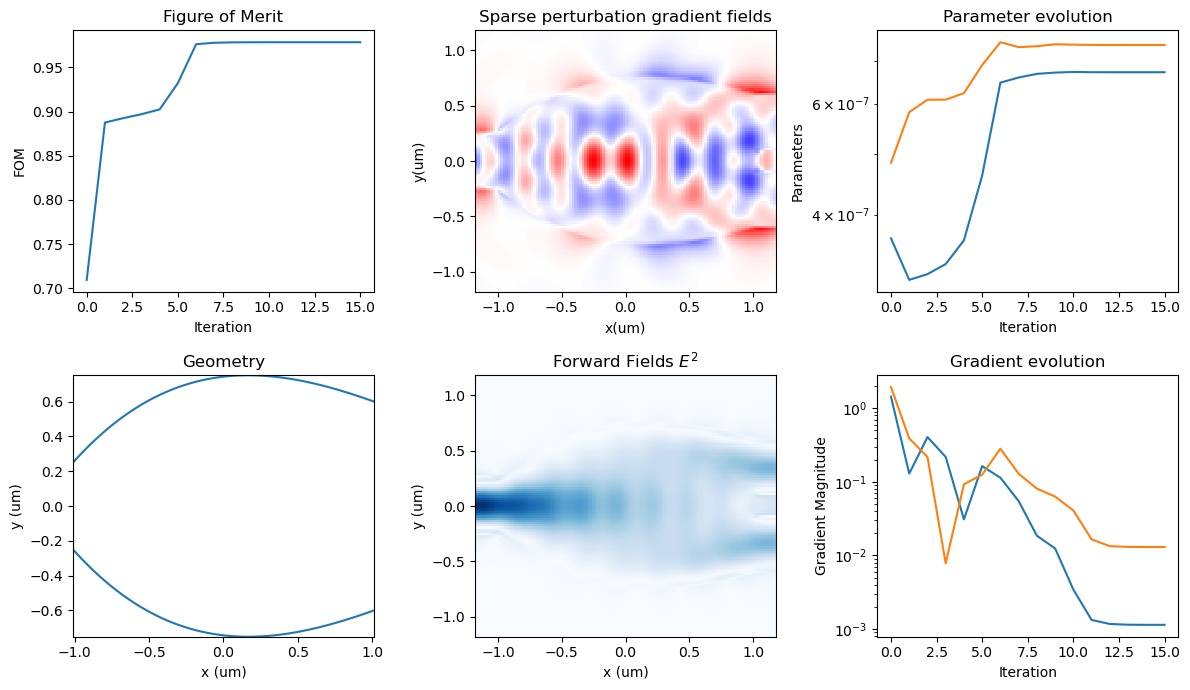

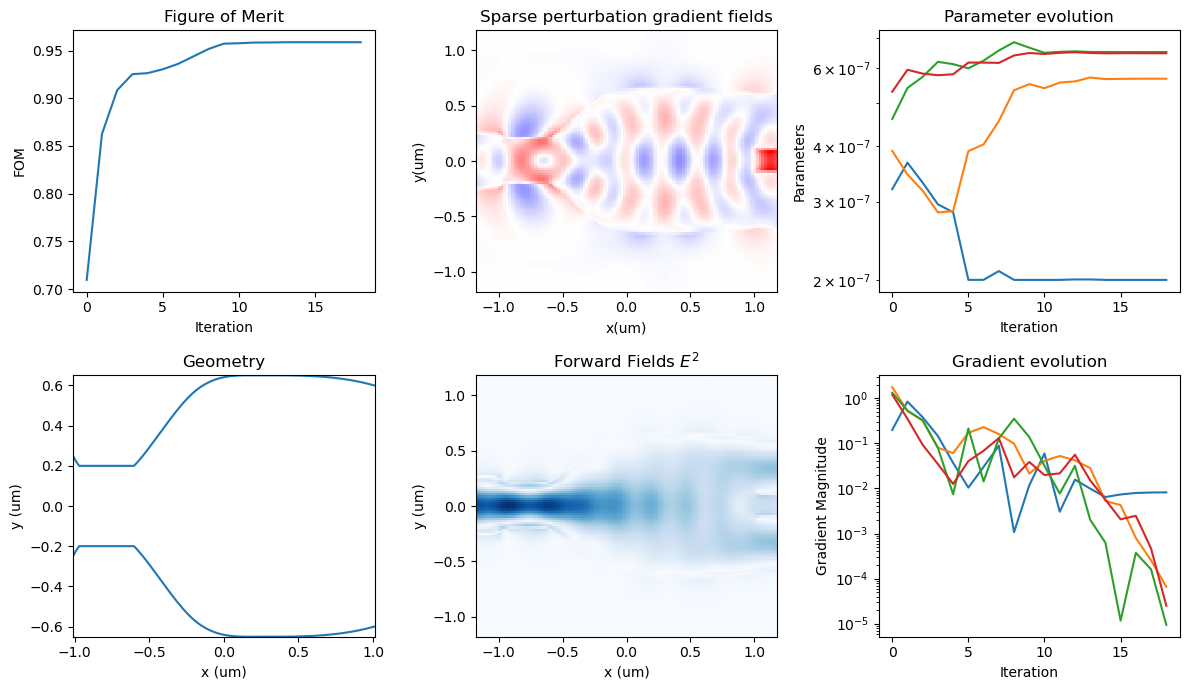

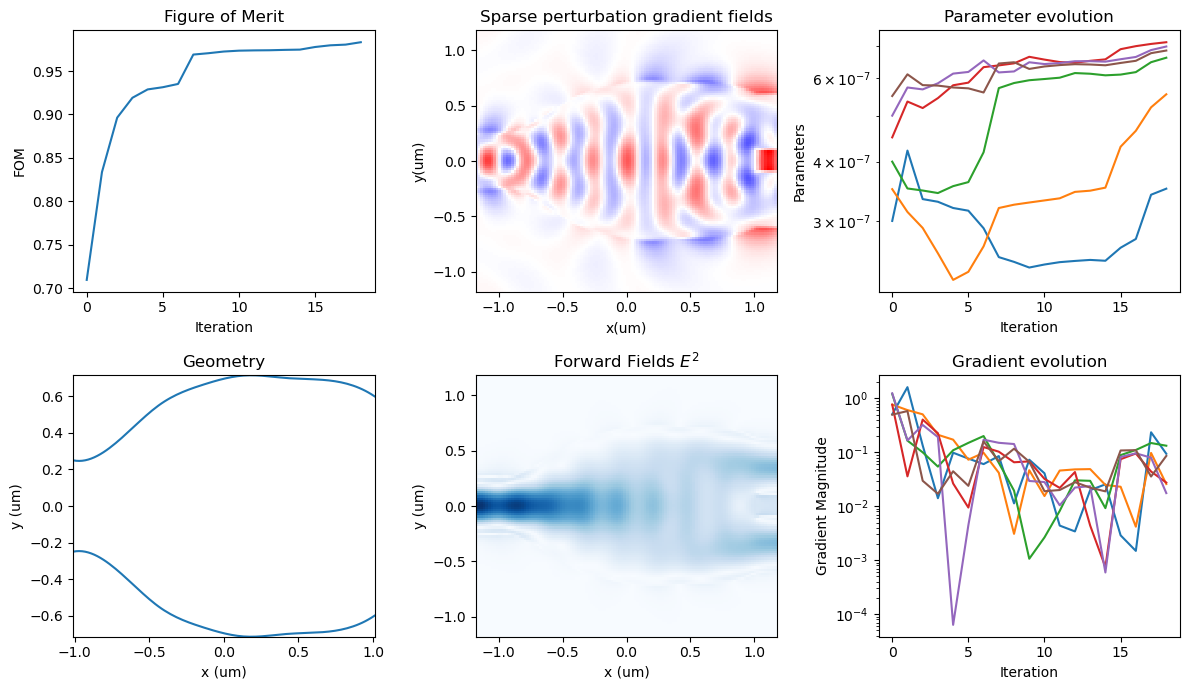

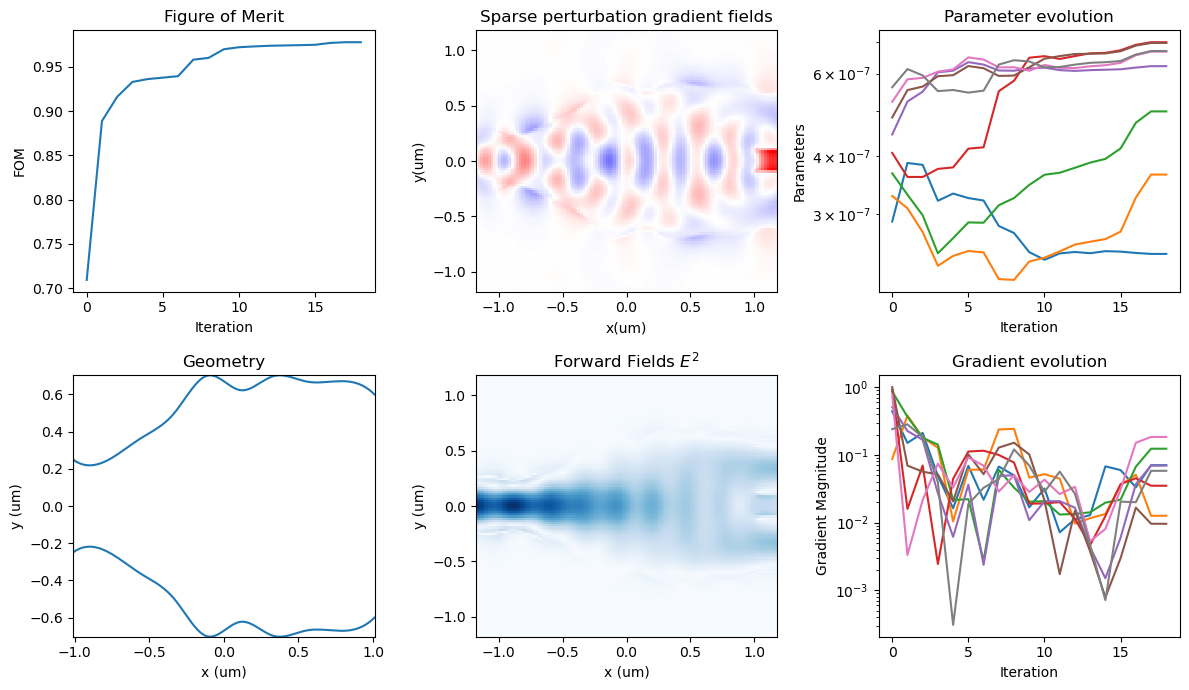

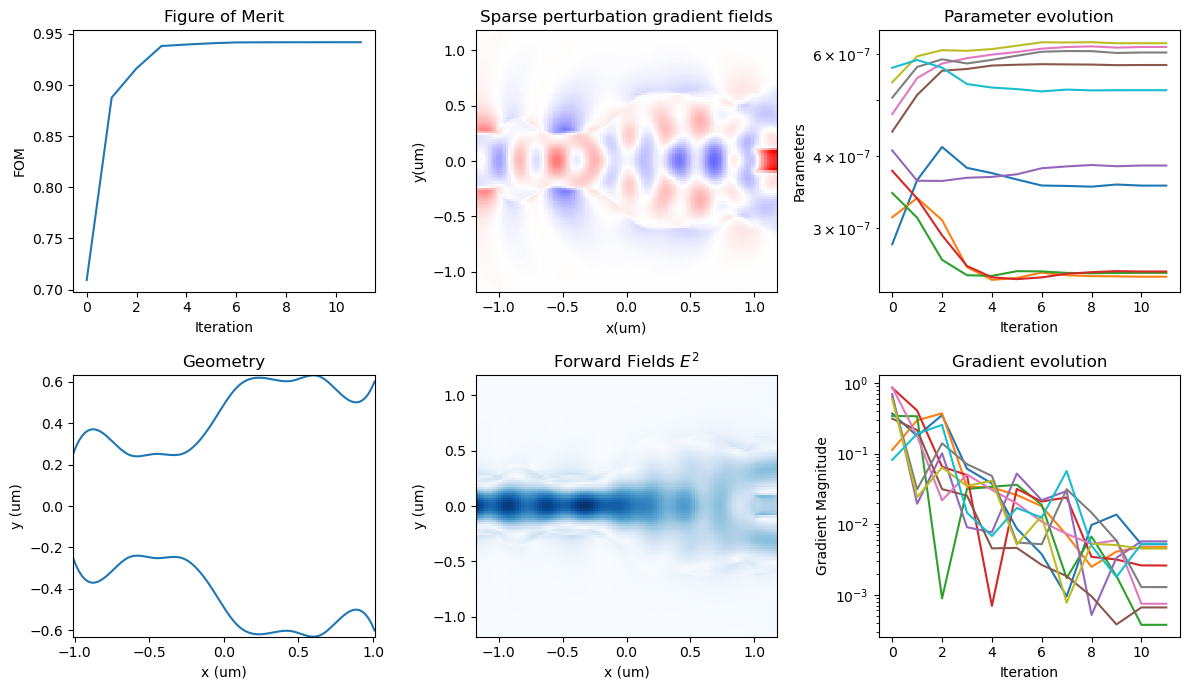

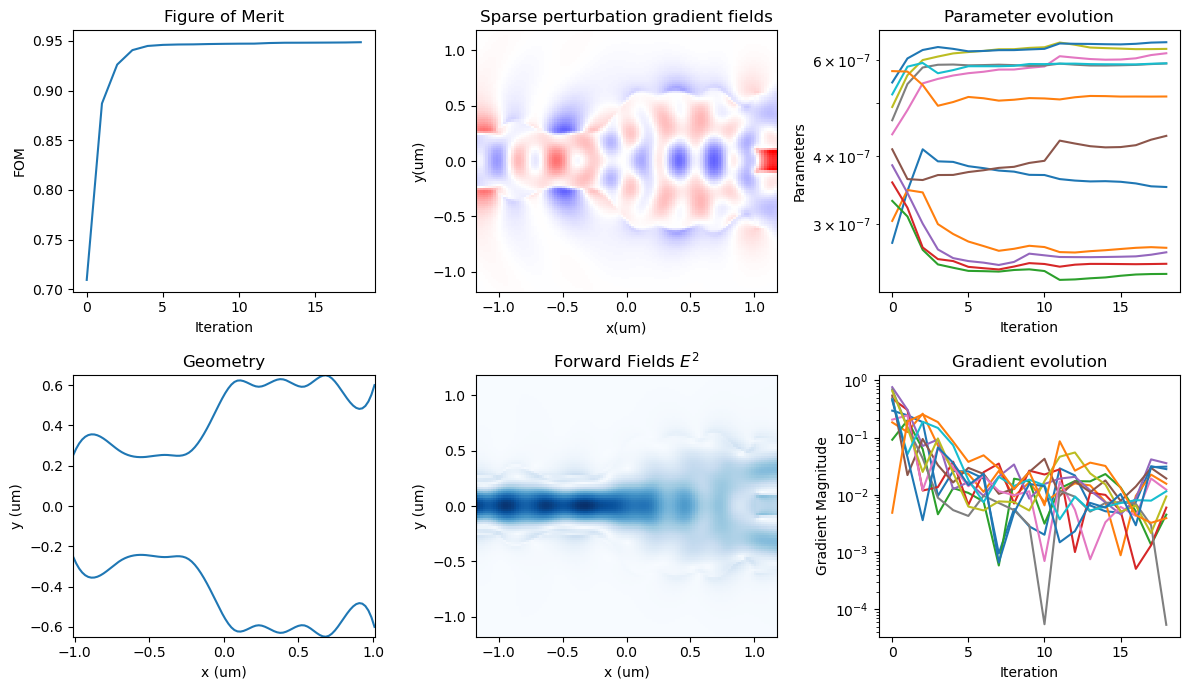

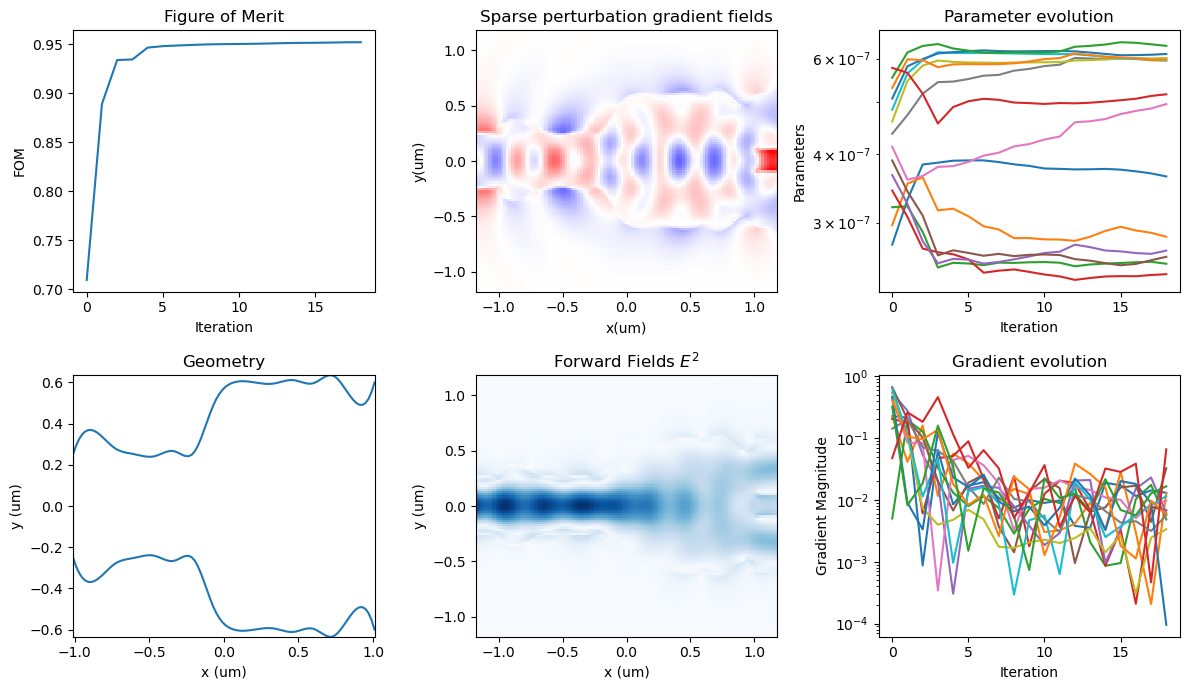

In [14]:
result_arr = []

for i in range(2, 15, 2):
    ybr, base_script = ybranch_2D(mesh = 2, num_params = i)
    opt = optimizer2D(ybr, base_script)
    results = opt.run()
    result_arr.append(results)

In [19]:
for i in range(len(result_arr)):
    print(i, result_arr[i][0])

0 0.9785225921110259
1 0.9587501985592364
2 0.9831683189724723
3 0.9778739005110177
4 0.9419574593310481
5 0.9486935420540327
6 0.9518861747225191


So these results reveal that this is obviously not the case. 

The rest of this notebook is just additional testing of nonconvexity.

In [ ]:
def add_random_numbers(array, ranges):
    """
    Adds a random number to each element of an array, where the random number
    for each element falls within a specified range given by a tuple.

    Parameters:
    array (np.array): The original array of values.
    ranges (list of tuples): A list of tuples (min, max) specifying the range 
                             of random values to be added to each array element.

    Returns:
    np.array: The modified array with random numbers added.
    """
    modified_array = np.array(array)
    for i in range(1, len(array) - 1):  # Skip the first and last element
        min_val, max_val = ranges[i]
        # Generate a random number specifically for this element
        random_addition = np.random.uniform(min_val, max_val) * 1e-6
        # Add the random number to the current element
        modified_array[i] += random_addition
        # Ensure the modified element remains within the specified bounds
        modified_array[i] = np.clip(modified_array[i], 0.2e-6, 0.9e-6)
    return modified_array

In [ ]:
initial_conditions = np.linspace(0.25e-6, 0.6e-6, 12)
ranges = [(-0.05, 0.21), (-0.05, 0.33), (-0.05, 0.4), (-0.08, 0.37), (-0.12, 0.35),
          (-0.16, 0.3), (-0.18, 0.27), (-0.22, 0.24), (-0.3, 0.24), (-0.3, 0.24),
          (-0.25, 0.19), (-0.15, 0.15)]

modified_conditions = add_random_numbers(initial_conditions, ranges)

In [ ]:
initial_conditions = np.linspace(0.25e-6, 0.6e-6, 12)
modified_conditions = []
for _ in range(10):
    modified_conditions.append(add_random_numbers(initial_conditions, ranges))
    

In [ ]:
modified_conditions

In [ ]:
def modify_conditions_simple(initial_conditions):
    # Create a copy of the initial array to preserve the first and last elements
    modified = np.array(initial_conditions)
    
    # Apply random multipliers only to the internal elements
    if len(initial_conditions) > 2:
        random_factors = np.random.uniform(0.7, 1.5, size=len(initial_conditions) - 2)
        modified[1:-1] = initial_conditions[1:-1] * random_factors

        # Clamp the values to ensure they stay within the specified bounds
        modified[1:-1] = np.clip(modified[1:-1], 0.2e-6, 0.9e-6)
    
    return modified

In [ ]:
initial_conditions = np.linspace(0.25e-6, 0.6e-6, 12)
modified_conditions = modify_conditions_simple(initial_conditions)
modified_conditions

In [ ]:

modified_conditions = []

initial_conditions = np.linspace(0.25e-6, 0.6e-6, 12)

for _ in range(5):
    modified_conditions.append(modify_conditions_simple(initial_conditions))

In [ ]:
import time

In [ ]:
print(opt.fom_hist)